### **Numerical Solution to Kepler’s Problem using Euler’s Method in Julia**  
Euler’s method is a simple **explicit numerical integration technique** used to approximate solutions to **ordinary differential equations (ODEs)**. It’s easy to implement but suffers from numerical instability for long-term simulations.

---

## **1. Problem Formulation**  
Kepler’s problem involves solving **Newton’s second law** for a two-body system:

$$
\frac{d^2 \mathbf{r}}{dt^2} = -\frac{GM}{|\mathbf{r}|^3} \mathbf{r}
$$

where:  
- $\mathbf{r} = (x, y)$ is the position vector.  
- $GM$ is the gravitational parameter.  
- We rewrite this as a system of first-order ODEs:  

$$
\frac{dx}{dt} = v_x, \quad \frac{dy}{dt} = v_y
$$

$$
\frac{dv_x}{dt} = -\frac{GM}{r^3} x, \quad \frac{dv_y}{dt} = -\frac{GM}{r^3} y
$$

where $ r = \sqrt{x^2 + y^2} $.

---

## **2. Euler's Method**
Euler’s method updates the state using:

$$
y_{n+1} = y_n + h f(y_n)
$$

where:  
- $ h $ is the time step.  
- $ f(y) $ is the derivative function.

---

## **3. Implementation in Julia**


In [2]:
using Plots

# Define the Kepler Problem
Base.@kwdef mutable struct Kepler
    dt::Float64 = 0.001
    G::Float64 = 4 * π^2  # AU^3 / (yr^2 * M_sun)
    M::Float64 = 1.0      # Solar mass
    x::Float64 = 1.0      # Position (1 AU from Sun)
    vx::Float64 = 0.0     # Velocity (AU/yr)
    y::Float64 = 0.0      # Position (1 AU from Sun)
    vy::Float64 = 2π      # Velocity (AU/yr)
end

Kepler

In [3]:
function euler_step!(k::Kepler)
    r = sqrt(k.x^2 + k.y^2)
    ax = -k.G * k.M * k.x / r^3
    ay = -k.G * k.M * k.y / r^3

    KE = 0.5 * (k.vx^2 + k.vy^2)
    PE = -k.G * k.M / r
    TE = KE + PE

    # Euler updates
    k.x += k.dt * k.vx
    k.y += k.dt * k.vy
    k.vx += k.dt * ax
    k.vy += k.dt * ay

    return k.x, k.y, KE, PE, TE
end

euler_step! (generic function with 1 method)

In [31]:
# Initialize system
kepler = Kepler()

# Store simulation results
num_steps = 2500
x_vals = Float64[]
y_vals = Float64[]
KE_vals = Float64[]
PE_vals = Float64[]
TE_vals = Float64[]
time_vals = Float64[]

Float64[]

In [35]:
# Run simulation and store values
for i in 1:num_steps
    x, y, KE, PE, TE = euler_step!(kepler)

    push!(x_vals, x)
    push!(y_vals, y)
    push!(KE_vals, KE)
    push!(PE_vals, PE)
    push!(TE_vals, TE)
    push!(time_vals, i * kepler.dt)
end

[ Info: Saved animation to /home/kevin/Documents/projects/100DaysJulia/day-4-kepler-problem/tmp.gif


Plots.AnimatedGif("/home/kevin/Documents/projects/100DaysJulia/day-4-kepler-problem/tmp.gif")
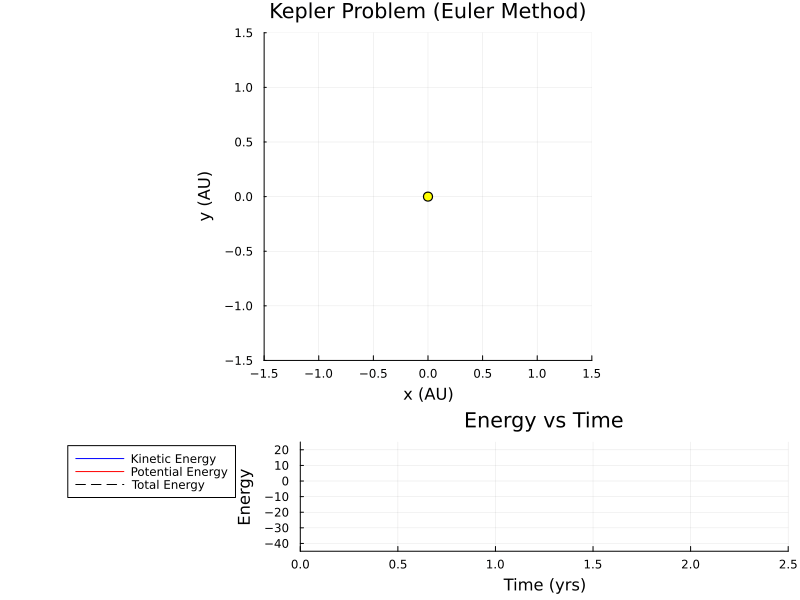

In [37]:
# Set up plots
plt_orbit = plot(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5),
                 title="Kepler Problem (Euler Method)", xlabel="x (AU)", ylabel="y (AU)",
                 legend=false, aspect_ratio=:equal)
# Define a custom layout
custom_layout = @layout [a; b{0.25h}]  # Orbit plot (a) takes more space, energy plot (b) is 50% height

# Animate
@gif for i in 1:num_steps
    plot!(plt_orbit, x_vals[1:i], y_vals[1:i], label="", color=:blue)
    scatter!([0], [0], color=:yellow, markersize=5, label="Sun")

    plt_energy = plot(time_vals[1:i], KE_vals[1:i], label="Kinetic Energy", color=:blue, title="Energy vs Time",
        xlabel="Time (yrs)", ylabel="Energy", xlim=(0, num_steps * kepler.dt), ylim=(-45, 25),legend = :outertopleft)
    plot!(plt_energy, time_vals[1:i], PE_vals[1:i], label="Potential Energy", color=:red)
    plot!(plt_energy, time_vals[1:i], TE_vals[1:i], label="Total Energy", color=:black, linestyle=:dash)

    plot(plt_orbit, plt_energy, layout=custom_layout, size=(800, 600))
end every 20
